<a href="https://colab.research.google.com/github/SatyaPraveenKumarreddyYalla/Codespaze/blob/main/IPL_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn import discriminant_analysis as DCA
from sklearn import cluster

In [19]:
#data
df = pd.read_csv('/content/sample_data/IPL_Dataset(2008-2024).csv')
df.head()

Match_ID        Date                                              Teams  \
0    335982  18-04-2008  Royal Challengers Bangalore vs Kolkata Knight ...   
1    335983  19-04-2008             Kings XI Punjab vs Chennai Super Kings   
2    335984  19-04-2008               Delhi Daredevils vs Rajasthan Royals   
3    335985  20-04-2008      Mumbai Indians vs Royal Challengers Bangalore   
4    335986  20-04-2008           Kolkata Knight Riders vs Deccan Chargers   

                                        Venue                  Toss_Winner  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
2                            Feroz Shah Kotla             Rajasthan Royals   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens              Deccan Chargers   

  Toss_Decision                 Match_Winner Win_Type  Win_Margin  \
0         field        Kolkata Knight Riders     runs       140.0   
1           bat          Chennai Super Kings     runs        33.0   
2           bat             Delhi Daredevils  wickets         9.0   
3           bat  Royal Challengers Bangalore  wickets         5.0   
4           bat        Kolkata Knight Riders  wickets         5.0   

   First_Innings_Score  Second_Innings_Score Player_of_Match     Umpire  \
0                  222                  82.0     BB McCullum  Asad Rauf   
1                  240                 207.0      MEK Hussey  MR Benson   
2                  129                 132.0     MF Maharoof  Aleem Dar   
3                  165                 166.0      MV Boucher   SJ Davis   
4                  110                 112.0       DJ Hussey  BF Bowden   

          Umpire1            Umpire2  Powerplay_Scores  Middle_Overs_Scores  \
0     RE Koertzen          J Srinath                61                   97   
1      SL Shastri  S Venkataraghavan                53                  116   
2  GA Pratapkumar       GR Viswanath                40                   66   
3       DJ Harper          J Srinath                47                   71   
4     K Hariharan        FM Engineer                39                   43   

   Death_Overs_Scores  
0                  64  
1                  71  
2                  23  
3                  47  
4                  28

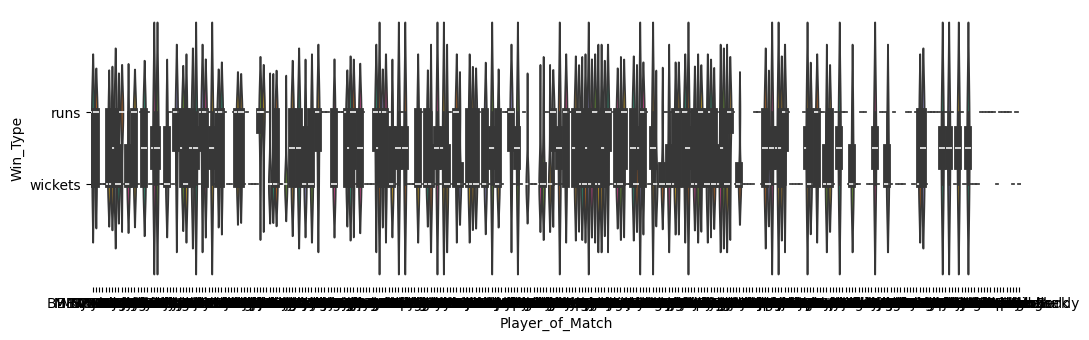

In [27]:
figsize = (12, 1.2 * len(df['Win_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Player_of_Match', y='Win_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Match_ID              1073 non-null   int64  
 1   Date                  1073 non-null   object 
 2   Teams                 1073 non-null   object 
 3   Venue                 1073 non-null   object 
 4   Toss_Winner           1073 non-null   object 
 5   Toss_Decision         1073 non-null   object 
 6   Match_Winner          1073 non-null   object 
 7   Win_Type              1054 non-null   object 
 8   Win_Margin            1054 non-null   float64
 9   First_Innings_Score   1073 non-null   int64  
 10  Second_Innings_Score  1070 non-null   float64
 11  Player_of_Match       1068 non-null   object 
 12  Umpire                1073 non-null   object 
 13  Umpire1               1073 non-null   object 
 14  Umpire2               1073 non-null   object 
 15  Powerplay_Scores     

In [8]:
df.describe()

Match_ID   Win_Margin  First_Innings_Score  Second_Innings_Score  \
count  1.073000e+03  1054.000000          1073.000000           1070.000000   
mean   8.941365e+05    17.158444           165.164958            151.918692   
std    3.637486e+05    21.762303            31.904238             31.751666   
min    3.359820e+05     1.000000            56.000000              2.000000   
25%    5.483260e+05     6.000000           145.000000            134.000000   
50%    9.809390e+05     8.000000           165.000000            153.000000   
75%    1.216540e+06    19.750000           186.000000            172.000000   
max    1.426287e+06   146.000000           287.000000            262.000000   

       Powerplay_Scores  Middle_Overs_Scores  Death_Overs_Scores  
count       1073.000000          1073.000000         1073.000000  
mean          46.074557            78.248835           40.841566  
std           12.007306            18.604148           14.228121  
min           15.000000             0.000000            0.000000  
25%           38.000000            66.000000           33.000000  
50%           46.000000            77.000000           41.000000  
75%           53.000000            90.000000           50.000000  
max          125.000000           155.000000           89.000000

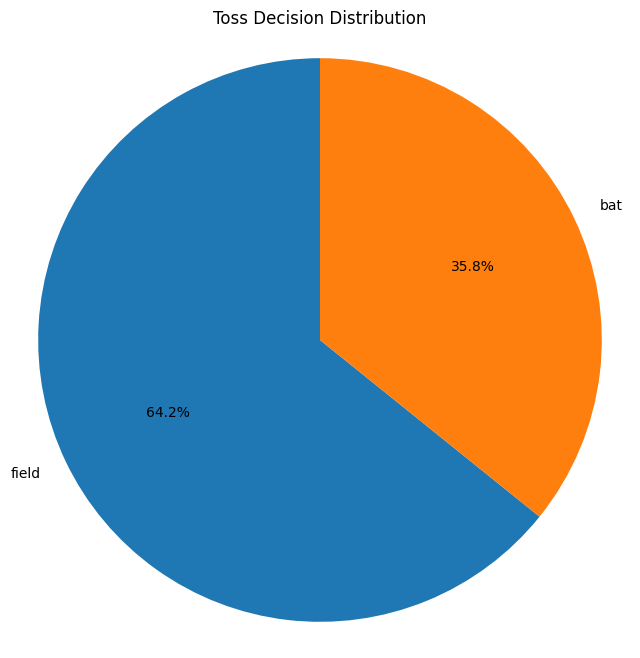

In [9]:
toss_decision_counts = df['Toss_Decision'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(toss_decision_counts, labels=toss_decision_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Toss Decision Distribution')
plt.axis('equal')
plt.show()


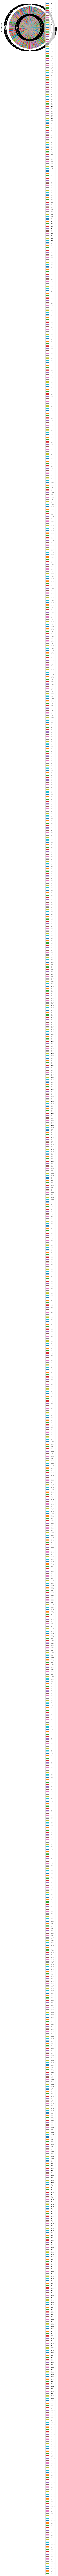

In [82]:
df.plot(kind='pie', x='Match_ID', y='Win_Margin', autopct='%1.1f%%',figsize=(6,6))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [14]:
import plotly.express as px

# Calculate value counts for 'Win_Margin'
win_margin_counts = df['Win_Margin'].value_counts().reset_index()
win_margin_counts.columns = ['Win_Margin', 'count']

fig = px.pie(
    win_margin_counts,
    values='count',
    names='Win_Margin',
    title='Win Margin Distribution (3D)',
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)
fig.show()

In [20]:
fig = px.pie(
    df,
    values='Win_Margin',
    names='Player_of_Match',
    title='Winner_of_Player',
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)
fig.show()

In [15]:
import plotly.express as px
fig = px.scatter(df, x="Match_ID", y="Win_Margin")
fig.show()

/n/n


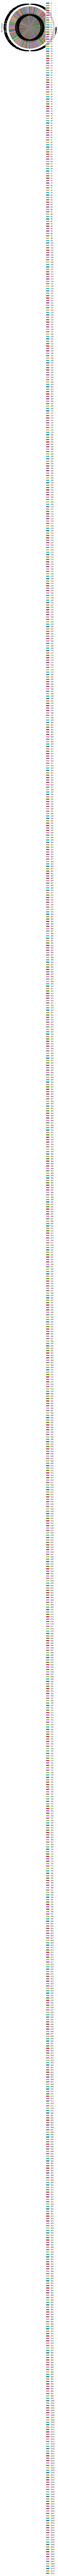

In [16]:
#3-D
# !pip install plotly
# !pip install mayavi
import plotly.express as px
fig = px.scatter_3d(df, x="Match_ID", y="Win_Margin", z="Toss_Decision")
fig.show()
print("/n/n")
#1
df.plot(kind='pie', x='Match_ID', y='Win_Margin', autopct='%1.1f%%',figsize=(6,6))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().add_artist(plt.Circle((0,0),0.7,color='black',alpha=0.2))

In [17]:
fig = px.pie(
    df,
    values='Win_Margin',
    names='Match_ID',
    title='Win Margin Distribution (3D)',
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)
fig.show()

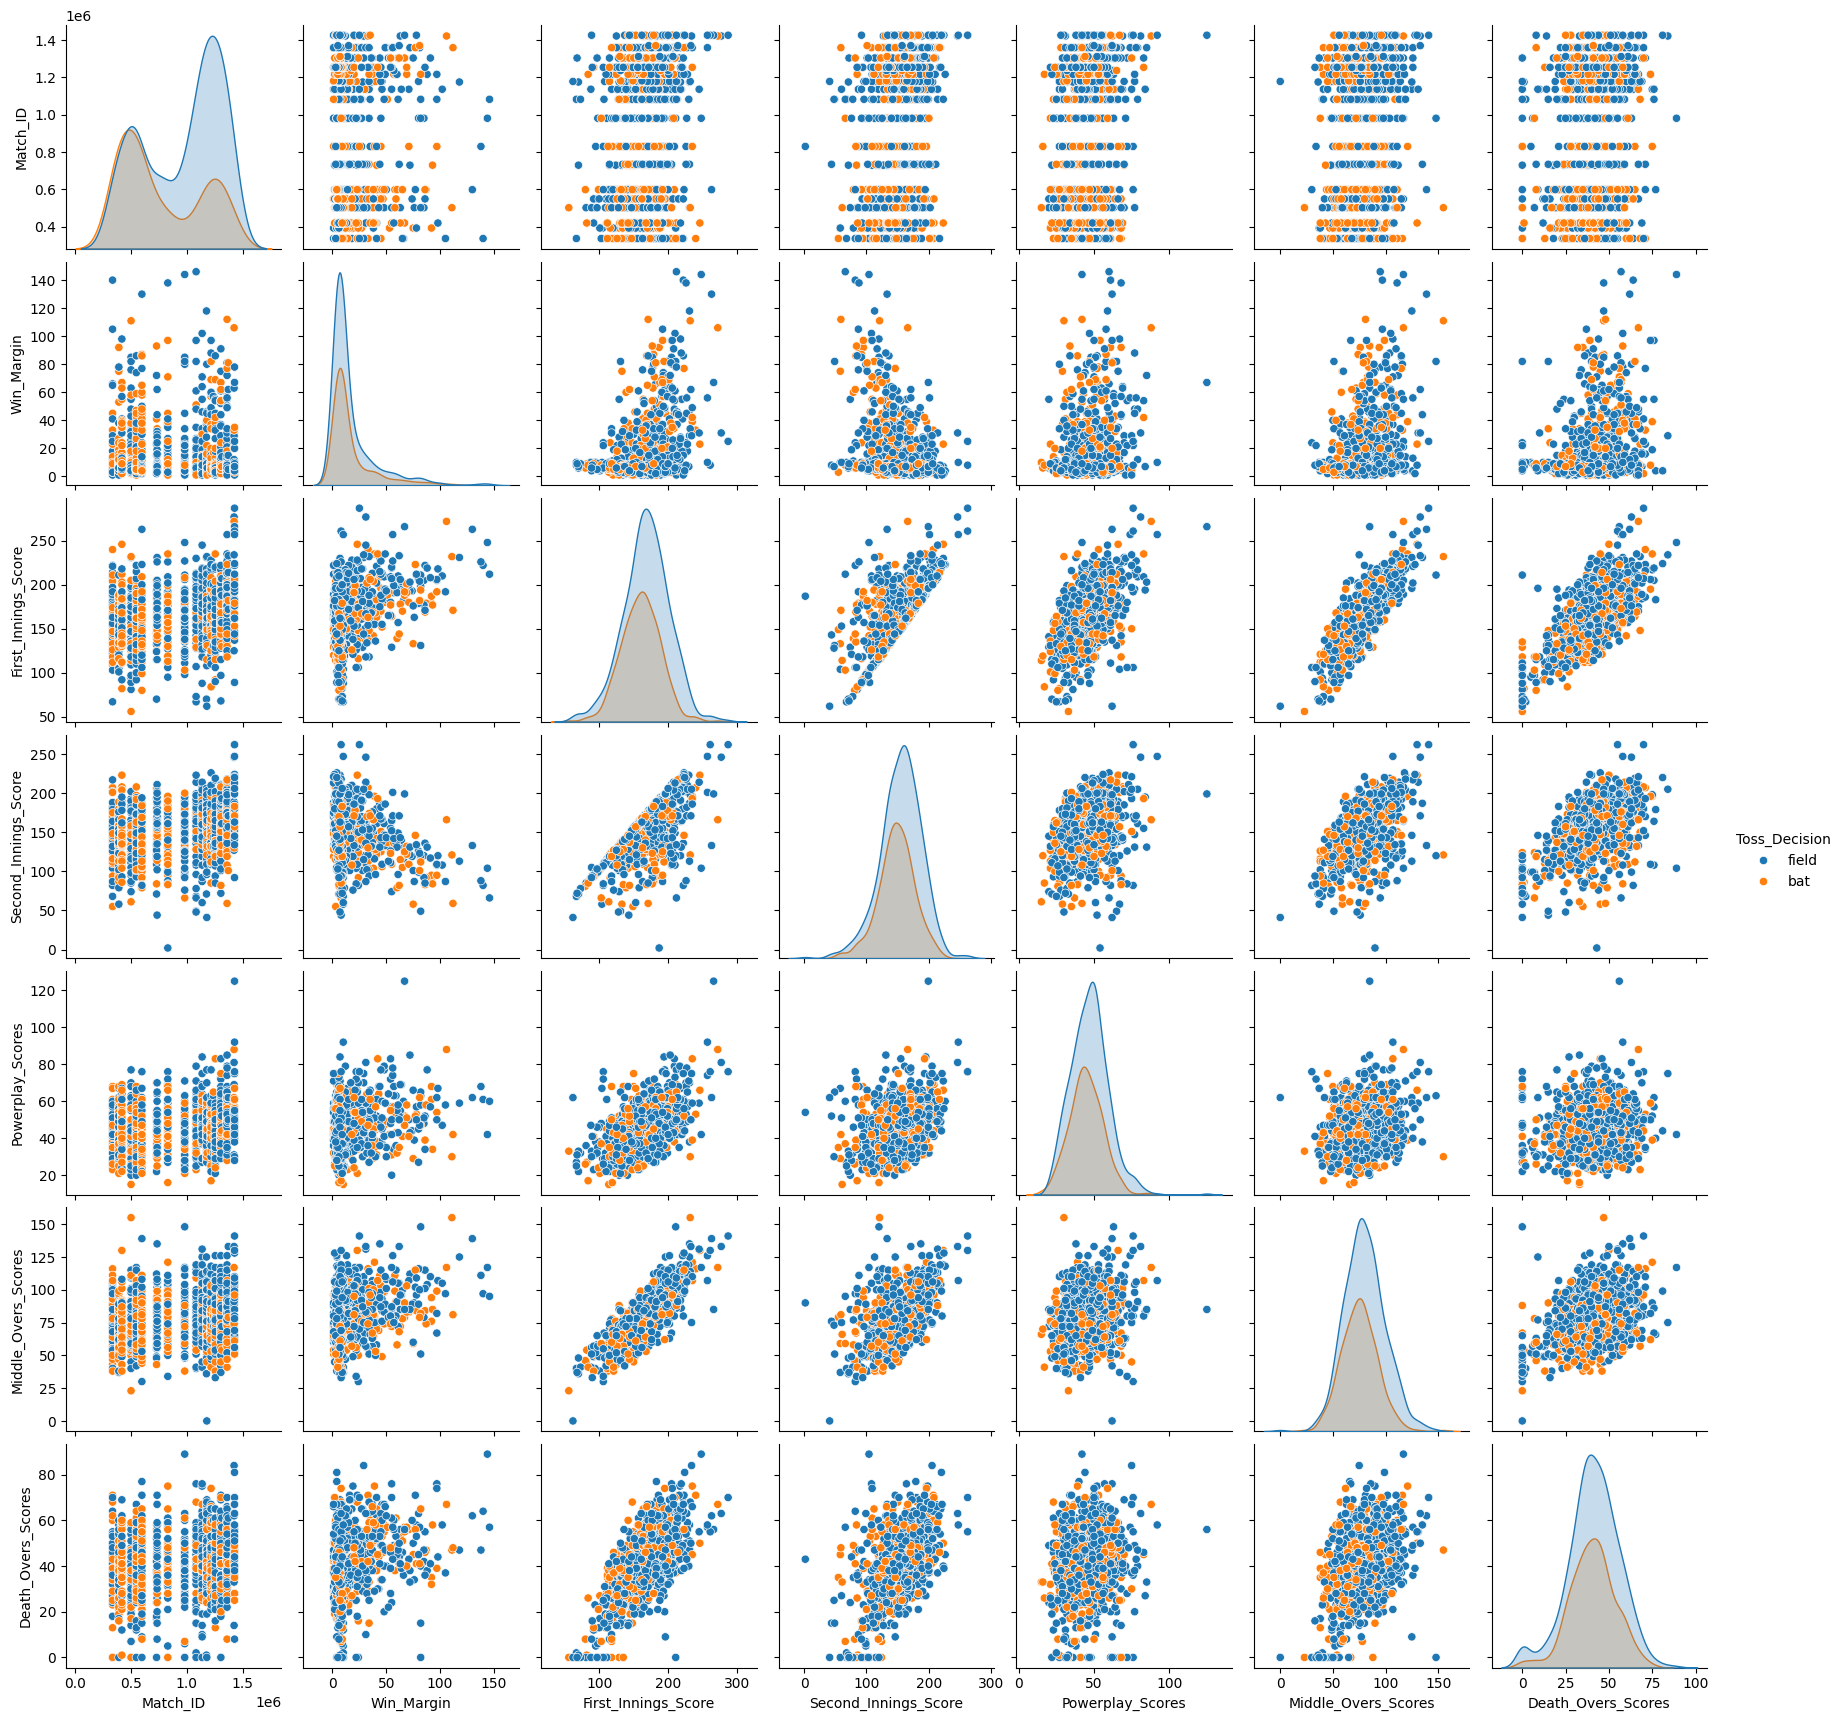

In [18]:
sns.pairplot(df,hue="Toss_Decision")


In [87]:
fig = px.pie(
    df,
    values='Win_Margin',
    names='Player_of_Match',
    title='Win Margin of Player🏏',
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)
fig.show()

In [88]:
fig = px.pie(
    df,
    values='Win_Margin',
    names='Umpire',
    title='Win Margin of Umpire',
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

In [89]:
fig = px.pie(
    df,
    values='Win_Margin',
    names='Umpire1',
    title='Win Margin of Umpire',
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

In [90]:
fig = px.pie(
    df,
    values='Win_Margin',
    names='Umpire2',
    title='Win Margin of Umpire',
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

In [91]:
fig = px.pie(
    df,
    values='Win_Margin',
    names='Teams',
    title='Win Margin of Teams',
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

In [92]:
fig = px.pie(
    df,
    values='Win_Margin',
    names='Venue',
    title='Player of match in a Venue',
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

In [93]:
fig = px.pie(
    df,
    values='Win_Margin',
    names='Toss_Decision',
    title='Toss Decision to win_margin',
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

#SUPERVISE_LEARNING

In [94]:
df1=df
df1.head()

Match_ID        Date                                              Teams  \
0    335982  18-04-2008  Royal Challengers Bangalore vs Kolkata Knight ...   
1    335983  19-04-2008             Kings XI Punjab vs Chennai Super Kings   
2    335984  19-04-2008               Delhi Daredevils vs Rajasthan Royals   
3    335985  20-04-2008      Mumbai Indians vs Royal Challengers Bangalore   
4    335986  20-04-2008           Kolkata Knight Riders vs Deccan Chargers   

                                        Venue                  Toss_Winner  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
2                            Feroz Shah Kotla             Rajasthan Royals   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens              Deccan Chargers   

  Toss_Decision                 Match_Winner Win_Type  Win_Margin  \
0         field        Kolkata Knight Riders     runs       140.0   
1           bat          Chennai Super Kings     runs        33.0   
2           bat             Delhi Daredevils  wickets         9.0   
3           bat  Royal Challengers Bangalore  wickets         5.0   
4           bat        Kolkata Knight Riders  wickets         5.0   

   First_Innings_Score  Second_Innings_Score Player_of_Match     Umpire  \
0                  222                  82.0     BB McCullum  Asad Rauf   
1                  240                 207.0      MEK Hussey  MR Benson   
2                  129                 132.0     MF Maharoof  Aleem Dar   
3                  165                 166.0      MV Boucher   SJ Davis   
4                  110                 112.0       DJ Hussey  BF Bowden   

          Umpire1            Umpire2  Powerplay_Scores  Middle_Overs_Scores  \
0     RE Koertzen          J Srinath                61                   97   
1      SL Shastri  S Venkataraghavan                53                  116   
2  GA Pratapkumar       GR Viswanath                40                   66   
3       DJ Harper          J Srinath                47                   71   
4     K Hariharan        FM Engineer                39                   43   

   Death_Overs_Scores  
0                  64  
1                  71  
2                  23  
3                  47  
4                  28

In [95]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
# Correct the typo in 'cloumns_to_encode' to 'columns_to_encode'
columns_to_encode = ['Date','Teams','Venue','Toss_Winner','Toss_Decision','Match_Winner','Win_Type','Player_of_Match','Umpire','Umpire1','Umpire2']
for column in columns_to_encode:
    df1[column] = le.fit_transform(df1[column])
df1.head()

Match_ID  Date  Teams  Venue  Toss_Winner  Toss_Decision  Match_Winner  \
0    335982   435    181     23           16              1             9   
1    335983   463     63     40            0              0             0   
2    335984   463     40     16           13              0             3   
3    335985   495    124     55           10              0            17   
4    335986   495     84     14            1              0             9   

   Win_Type  Win_Margin  First_Innings_Score  Second_Innings_Score  \
0         0       140.0                  222                  82.0   
1         0        33.0                  240                 207.0   
2         1         9.0                  129                 132.0   
3         1         5.0                  165                 166.0   
4         1         5.0                  110                 112.0   

   Player_of_Match  Umpire  Umpire1  Umpire2  Powerplay_Scores  \
0               37       9       41       10                61   
1              149      34       52       22                53   
2              150       8       15        9                40   
3              167      51       14       10                47   
4               57      10       24        7                39   

   Middle_Overs_Scores  Death_Overs_Scores  
0                   97                  64  
1                  116                  71  
2                   66                  23  
3                   71                  47  
4                   43                  28

In [96]:
#Simple Linear
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def coeff(x,y):
  mean_x,mean_y = np.mean(x),np.mean(y)
  n = np.mean(x)
  b0 = (n*np.sum(y*x)-np.sum(x)*np.sum(y))/(n*np.sum(x*x)-np.sum(x)*np.sum(x))
  b1 = mean_y -(b0*mean_x)
  return b0,b1

def LinearRegression(x, y, b):
    x_values = x.iloc[:, 0]
    y_pred = b[0] + b[1] * x_values
    fig = px.pie(
    values=np.abs(y_pred),
    names=x_values.to_list(),
    title='Prediction of match first innings_Score',
    )
    fig.update_layout(width=800,height=600)
    fig.update_traces(
      textposition='inside',
      textinfo='percent+label'
    )
    fig.show()
    return y_pred

x = df1[["Match_ID","Date","Teams","Venue","Toss_Winner","Toss_Decision","Match_Winner","Win_Type","Win_Margin"]]
y = df1["First_Innings_Score"]
b = coeff(x.iloc[:, 0], y)
print("Slope: ",b[0])
print("Intercept: ",b[1])
y_pred = LinearRegression(x,y,b)

y_pred = []
for i in range(len(x)):
  y_pred.append(b[0] + b[1]*x.iloc[i, 0])
d = 0
for i in range(0,len(y)):
  d = d+(y[i]-y_pred[i])**2
print("MEAN_Square_Error : ",d/len(y))
print("R2_Score : ",r2_score(y,y_pred))
print("Mean_Absolute_Error: ",mean_absolute_error(y,y_pred))

ssr,sst=0,0
y_mean=np.mean(y)
for i in range(0,len(y)):
  ssr=ssr+(y_pred[i]-y_mean)**2
  sst = sst+(y[i]-y_mean)**2
print("R2_Score : ",1-(ssr/sst))

Slope:  0.00016141800606252465
Intercept:  20.83523332688611


MEAN_Square_Error :  404438052203714.06
R2_Score :  -397704211075.3378
Mean_Absolute_Error:  18629376.632952515
R2_Score :  -397704322966.085


#MLR

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
imputer = SimpleImputer(strategy='mean')
x = df1[["Match_ID","Date","Teams","Venue","Toss_Winner","Toss_Decision","Match_Winner","Win_Type","Win_Margin","First_Innings_Score","Second_Innings_Score","Umpire","Umpire1","Umpire2","Powerplay_Scores","Middle_Overs_Scores","Death_Overs_Scores"]]
y =df1["Player_of_Match"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain= imputer.fit_transform(xtrain)
xtest= imputer.transform(xtest)
MLRmodel=LinearRegression()
MLRmodel.fit(xtrain,ytrain)
trainpredict =MLRmodel.predict(xtrain)
testpredict = MLRmodel.predict(xtest)
print("Slope: ",MLRmodel.coef_)
print("Intercept: ",MLRmodel.intercept_)
print("Train_Score: ",MLRmodel.score(xtrain,ytrain))
print("Test_Score: ",MLRmodel.score(xtest,ytest))
print("Error : ",r2_score(ytest,testpredict))
fig = px.pie(
    values=np.abs(MLRmodel.coef_),
    names=x.columns,
    title='WINE TYPE',
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)
fig.show()

Slope:  [ 1.15909195e-05  4.71390081e-03 -8.13517032e-02  7.01192611e-02
  4.10514745e-01  2.01155117e+00 -5.95987668e-01  1.34124964e+01
 -1.62201425e-02  1.30477217e-01 -6.63685284e-02  1.13177776e-01
 -2.06555637e-01  3.28514573e-01  3.76014592e-01  5.43999829e-02
 -2.99937358e-01]
Intercept:  114.28334528396091
Train_Score:  0.019656615064567506
Test_Score:  -0.03975535489396087
Error :  -0.03975535489396087


In [25]:
import plotly.express as px

fig = px.pie(
    values=df[["First_Innings_Score","Second_Innings_Score","Powerplay_Scores","Middle_Overs_Scores","Death_Overs_Scores"]].sum(axis=1), # Calculate the sum of the specified columns for each row
    names=df["Player_of_Match"],
    title='Prediction of match first innings_Score',
)
fig.update_traces(
    textposition='inside',

    textinfo='percent+label'
)
fig.show()

#lOgistics

In [116]:
x = df1[["Match_ID","Date","Teams","Venue","Toss_Winner","Toss_Decision","Match_Winner","Win_Type","Win_Margin","First_Innings_Score","Second_Innings_Score","Umpire","Umpire1","Umpire2","Powerplay_Scores","Middle_Overs_Scores","Death_Overs_Scores"]]
y =df1["Player_of_Match"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain= imputer.fit_transform(xtrain)
xtest= imputer.transform(xtest)
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
train_accuracy = lr.score(xtrain, ytrain)
test_accuracy = lr.score(xtest, ytest)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
pred = lr.predict(xtest)
print(classification_report(ytest, pred))

x = df1[["Match_ID","Date","Teams","Venue","Toss_Winner","Toss_Decision","Match_Winner","Win_Type","Win_Margin","First_Innings_Score","Second_Innings_Score","Umpire","Umpire1","Umpire2","Powerplay_Scores","Middle_Overs_Scores","Death_Overs_Scores"]]
y =df1["Player_of_Match"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain= imputer.fit_transform(xtrain)
xtest= imputer.transform(xtest)
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
train_accuracy = lr.score(xtrain, ytrain)
test_accuracy = lr.score(xtest, ytest)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
pred = lr.predict(xtest)
print(classification_report(ytest, pred))

Train Accuracy: 0.037296037296037296
Test Accuracy: 0.004651162790697674
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          11       0.01      0.33      0.02         3
          12       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         2
          33       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         2
        

In [98]:
from sklearn.neighbors import KNeighborsClassifier
kNNmodel = KNeighborsClassifier(n_neighbors=8)
kNNmodel.fit(xtrain, ytrain)
train_accuracy = kNNmodel.score(xtrain, ytrain)
test_accuracy = kNNmodel.score(xtest, ytest)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
pred = kNNmodel.predict(xtest)
print(classification_report(ytest, pred))

Train Accuracy: 0.1585081585081585
Test Accuracy: 0.023255813953488372
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           3       0.07      0.33      0.12         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.04      0.33      0.06         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          16       0.08      0.20      0.12         5
          17       1.00      0.50      0.67         2
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
svm_model = SVC(kernel='linear')
svm_model.fit(xtrain, ytrain)
train_accuracy = svm_model.score(xtrain, ytrain)
test_accuracy = svm_model.score(xtest, ytest)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
pred = svm_model.predict(xtest)
print(classification_report(ytest, pred))

Train Accuracy: 0.8997668997668997
Test Accuracy: 0.04186046511627907
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.12      0.33      0.18         3
          12       0.50      1.00      0.67         1
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       1.00      0.33      0.50         3
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          2

#Descion_TREE

In [100]:
from sklearn.tree import DecisionTreeClassifier as DTC
x = df1[["Match_ID","Date","Teams","Venue","Toss_Winner","Toss_Decision","Match_Winner","Win_Type","Win_Margin","First_Innings_Score","Second_Innings_Score","Umpire","Umpire1","Umpire2","Powerplay_Scores","Middle_Overs_Scores","Death_Overs_Scores"]]
y =df1["Player_of_Match"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
clf = DTC(random_state=42)
clf.fit(xtrain, ytrain)
train_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)
y_pred = clf.predict(xtest)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print(classification_report(ytest, y_pred))
print("Accuracy : ",accuracy_score(ytest,y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.09302325581395349
              precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
          11       0.25      0.33      0.29         3
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          16       0.50      0.20      0.29         5
          17       1.00      0.50      0.67         2
          19       0.00      0.00      0.00         1
          21       0.50      0.33      0.40         3
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         0
          27       0.00   

In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range(1,100,2),
    'min_samples_split': range(5, 10, 2),
    'min_samples_leaf': range(2,5,1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ["gini","entropy"]
}
tree = DTC(random_state=42)
#GRID
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=15,verbose=True)
grid_search.fit(xtrain, ytrain)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 15 folds for each of 2700 candidates, totalling 40500 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Score: 0.06870336761443839


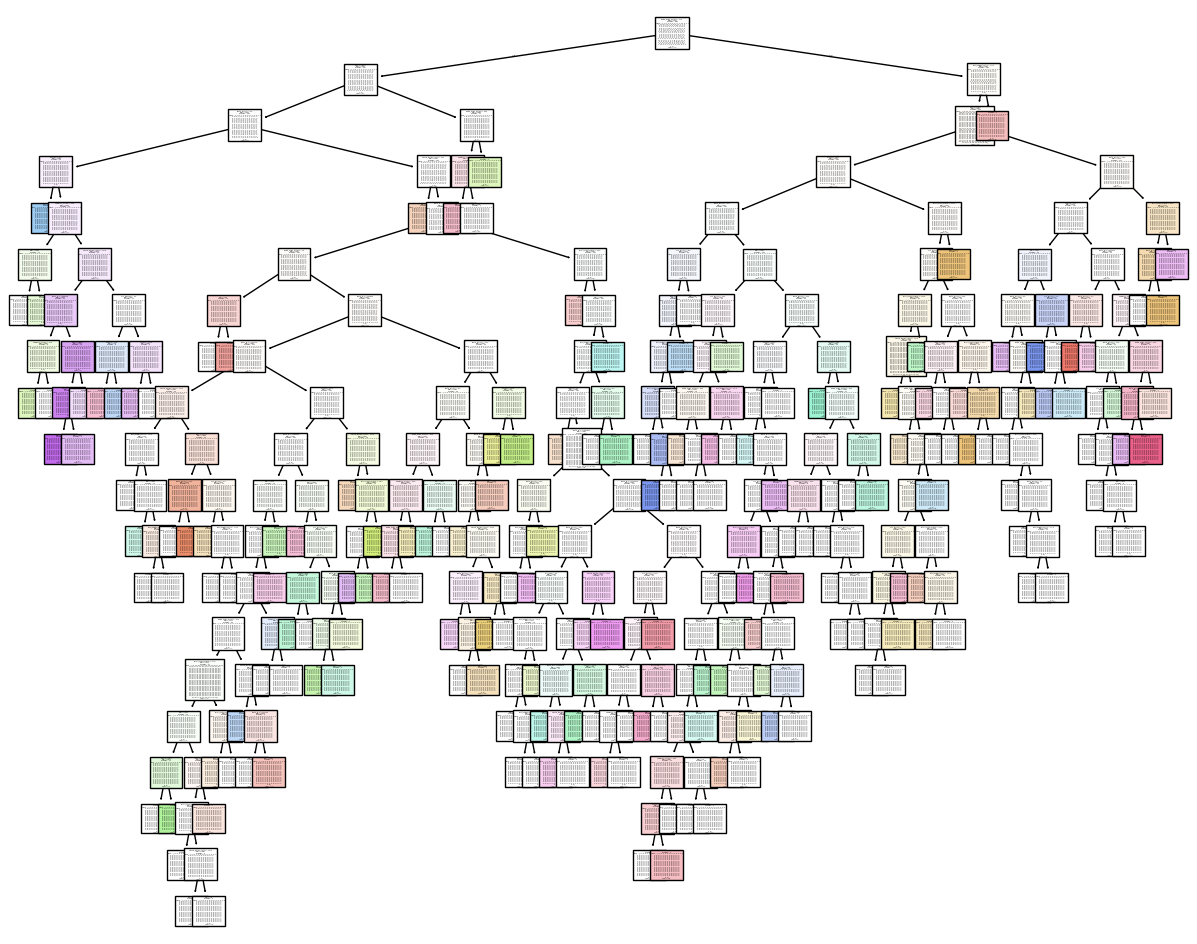

In [102]:
from sklearn.tree import plot_tree
tree_clf = grid_search.best_estimator_
plt.figure(figsize=(15,12))
class_name_str = [str(name) for name in y.unique()]
plot_tree(tree_clf, filled=True, feature_names=x.columns, class_names=class_name_str)
plt.show()

In [103]:
model = DTC()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           3       0.33      0.33      0.33         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          16       0.50      0.20      0.29         5
          17       0.50      0.50      0.50         2
          19       0.00      0.00      0.00         1
          21       1.00      0.33      0.50         3
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         2
          31       0.00    

In [104]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
x_imputed = imputer.fit_transform(x)

# Now use the imputed data for cross-validation
nb = GaussianNB()
nb_score = cross_val_score(nb, x_imputed, y, cv=15)
print('Navie bayes Score: ', nb_score.mean())

Navie bayes Score:  0.024256651017214394


#RANDOMForest

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score = cross_val_score(rf, x, y, cv=15)
print('Random Forest Score: ', rf_score.mean())

Random Forest Score:  0.11928794992175276


#KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

imputer = SimpleImputer(strategy='mean')
knn_pipeline = make_pipeline(imputer, KNeighborsClassifier(n_neighbors=10))
knn_score = cross_val_score(knn_pipeline, x, y, cv=15)
print('KNN Score: ', knn_score.mean())

KNN Score:  0.018596765779864365


#Visulazation_data